In [2]:
import numpy as np
import pandas as pd
import sys
reload(sys)
sys.setdefaultencoding("utf8")

In [3]:
train_data = pd.read_csv('/home/deepthinrao/Masters project/Restaurant Revenue Prediction/train.csv').reset_index()

In [4]:
train_data.shape

(137, 44)

In [5]:
train_data.columns

Index([u'index', u'Id', u'Open Date', u'City', u'City Group', u'Type', u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19', u'P20', u'P21', u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28', u'P29', u'P30', u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37', u'revenue'], dtype='object')

In [6]:
train_data.head()

,index,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4,4,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4,4,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,3,02/02/2012,Tokat,Other,IL,6,4.5,6,6,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3,4,...,3.0,5,1,3,2,3,4,3,3,4316715


In [7]:
print("Data type of each row is:")
train_data.dtypes

index           int64
Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

#Exploring relationship between open date and revenue

In [8]:
train_data['Date'] =pd.to_datetime(train_data['Open Date'])
train_data = train_data.sort('Date')
train_data.drop(['Open Date'],inplace=True,axis=1)


In [9]:
values = [s.__str__() for s in train_data[['Date']].values]
train_data.drop(['Date'],inplace=True,axis=1)
train_data['Date'] = [s[2:12] for s in values]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

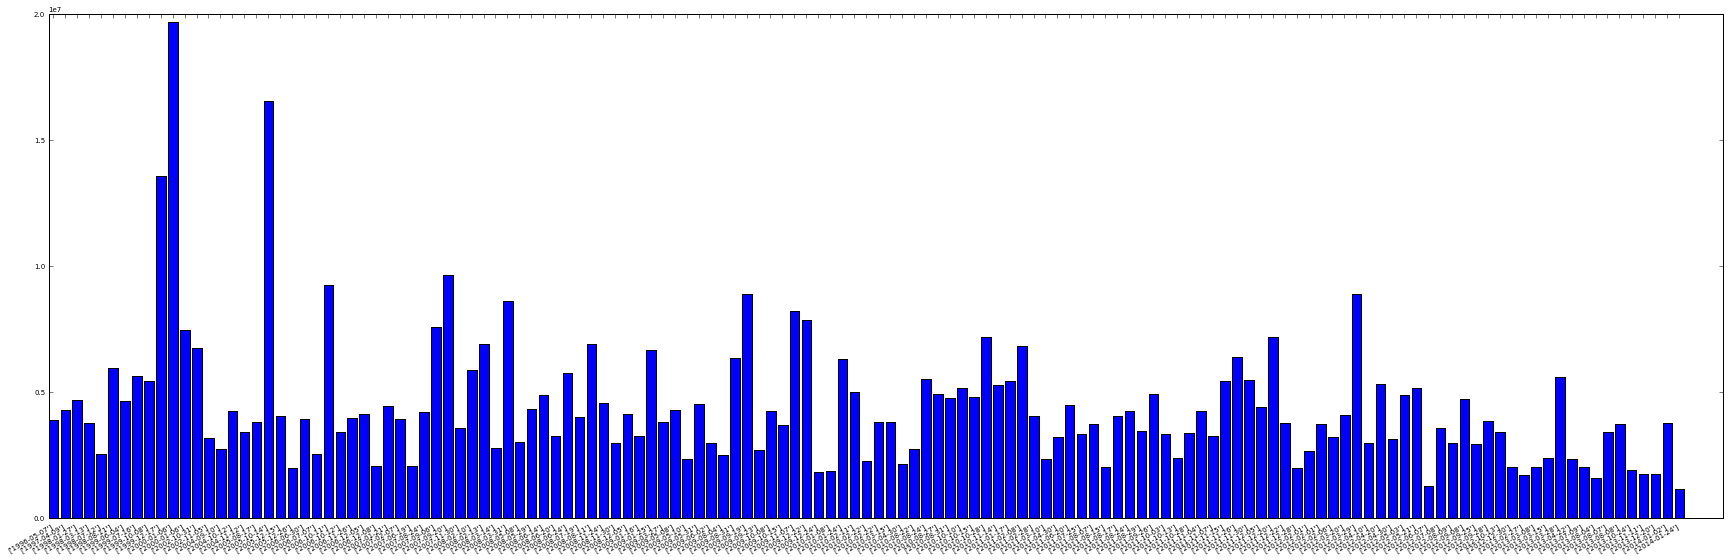

In [11]:
#Opening Date
plt.rcParams['figure.figsize'] = (300.0, 6.0)
plt.rcParams.update({'font.size': 7})
fig = plt.figure()
OY = train_data[['revenue']].values
OX = train_data[['Date']].values
ind = np.arange(len(OY))
plt.bar(ind, OY)
plt.xticks(ind + 0.75 / 2, OX)
fig.autofmt_xdate()
fig.set_size_inches(30,10)
plt.show()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams.update({'font.size': 10})

We can see that opening date has little effect on the revenue.

#A Quick look at P1-P37

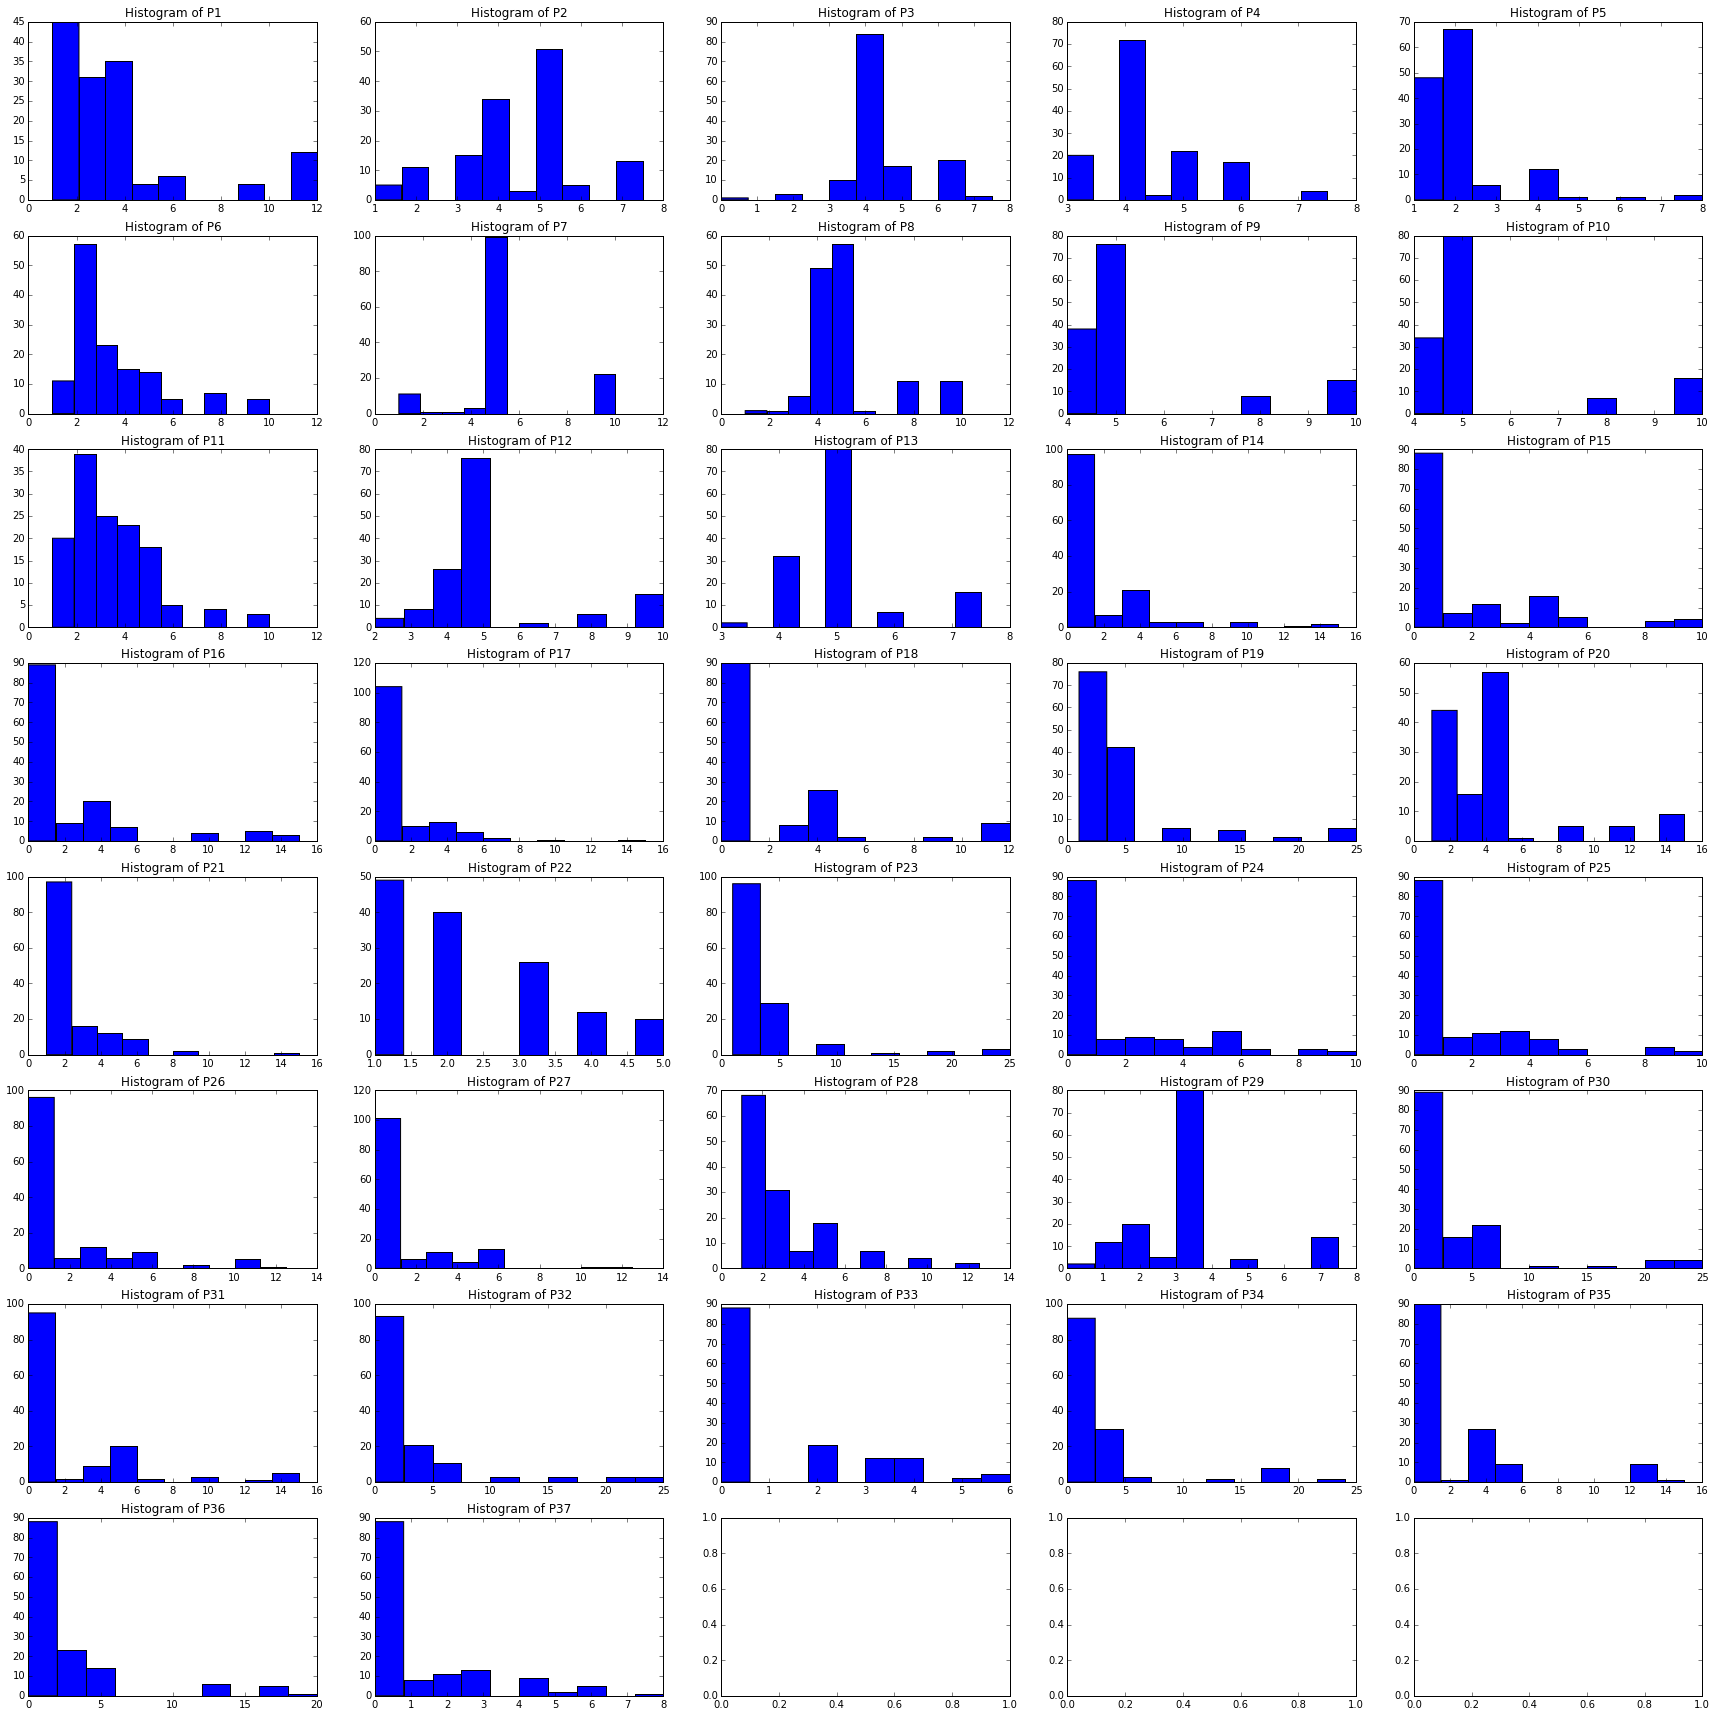

In [12]:
i = 1
plt.rcParams['figure.figsize'] = (30.0, 30.0)
f, axarr = plt.subplots(8, 5)
j =0
k = 0
while (i <= 37 and j < 8):
        k=0
        while (k < 5):
            colname="P"+str(i)
            axarr[j, k].hist( train_data[colname])
            axarr[j, k].set_title("Histogram of "+colname)
            i = i+1
            if (i == 38):
                break
            k = k+1
        j = j+1
plt.show()

#Analysing the revenue distribution:

In [13]:
#revenue distribution 
revenue_values = train_data[['revenue']].values
lowest = np.min(revenue_values)
highest = np.max(revenue_values)
average = revenue_values.mean()
print "lowest revenue: ", lowest
print "highest revenue: ", highest
print "lowest - highest: ", lowest - highest
print "average revenue: ", average

#lowest revenue:  1149870.0
#highest revenue:  19696939.0
#highest - lowest:  18547069.0
#average revenue:  4453532.61314

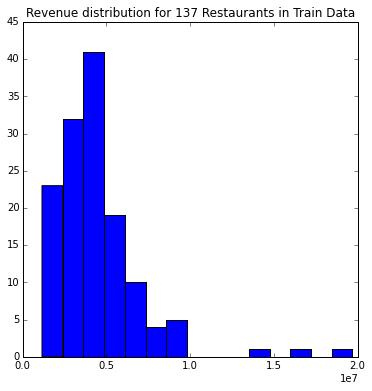

In [14]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.hist( revenue_values, bins=15 )
plt.title("Revenue distribution for 137 Restaurants in Train Data")
plt.show()

We see that the distribution has a few outliers. Revenue readings with values beyond 10000000 fall in this category. We can remove these outliers from training data

In [15]:
train_data = train_data[train_data[['revenue']].values < 10000000]
train_data.shape

(134, 44)

#Revenue in different city groups

In [16]:
train_data.groupby('City Group').describe()

Id         P1        P10        P11        P12  \
City Group                                                                 
Big Cities count   75.000000  75.000000  75.000000  75.000000  75.000000   
           mean    64.773333   4.693333   5.546667   3.426667   5.320000   
           std     38.316806   3.436581   1.940280   1.953329   2.014542   
           min      0.000000   1.000000   4.000000   1.000000   2.000000   
           25%     36.500000   2.500000   4.000000   2.000000   4.000000   
           50%     64.000000   4.000000   5.000000   3.000000   5.000000   
           75%     89.500000   4.000000   5.000000   4.500000   5.000000   
           max    136.000000  12.000000  10.000000  10.000000  10.000000   
Other      count   59.000000  59.000000  59.000000  59.000000  59.000000   
           mean    72.338983   3.152542   5.491525   3.000000   5.355932   
           std     41.526315   1.845905   1.755512   1.866215   1.864022   
           min      2.000000   1.000000   4.000000   1.000000   2.000000   
           25%     32.500000   2.000000   5.000000   2.000000   5.000000   
           50%     82.000000   3.000000   5.000000   3.000000   5.000000   
           75%    106.500000   4.000000   5.000000   4.000000   5.000000   
           max    134.000000   9.000000  10.000000  10.000000  10.000000   

                        P13        P14        P15        P16        P17  \
City Group                                                                
Big Cities count  75.000000  75.000000  75.000000  75.000000  75.000000   
           mean    5.086667   1.733333   1.653333   2.400000   1.346667   
           std     1.063438   3.125023   2.560053   3.869493   2.452210   
           min     4.000000   0.000000   0.000000   0.000000   0.000000   
           25%     4.000000   0.000000   0.000000   0.000000   0.000000   
           50%     5.000000   0.000000   0.000000   0.000000   0.000000   
           75%     5.000000   3.000000   3.000000   3.500000   2.000000   
           max     7.500000  15.000000  10.000000  15.000000  15.000000   
Other      count  59.000000  59.000000  59.000000  59.000000  59.000000   
           mean    5.127119   1.000000   1.033898   1.372881   0.610169   
           std     1.006844   2.100903   2.149307   2.970535   1.174689   
           min     3.000000   0.000000   0.000000   0.000000   0.000000   
           25%     5.000000   0.000000   0.000000   0.000000   0.000000   
           50%     5.000000   0.000000   0.000000   0.000000   0.000000   
           75%     5.000000   1.000000   1.000000   2.000000   1.000000   
           max     7.500000   9.000000  10.000000  15.000000   5.000000   

                       ...              P36        P37         P4         P5  \
City Group             ...                                                     
Big Cities count       ...        75.000000  75.000000  75.000000  75.000000   
           mean        ...         2.746667   1.266667   4.533333   2.000000   
           std         ...         4.650177   1.862382   1.069647   1.315192   
           min         ...         0.000000   0.000000   3.000000   1.000000   
           25%         ...         0.000000   0.000000   4.000000   1.000000   
           50%         ...         0.000000   0.000000   4.000000   2.000000   
           75%         ...         3.000000   2.000000   5.000000   2.000000   
           max         ...        20.000000   8.000000   7.500000   8.000000   
Other      count       ...        59.000000  59.000000  59.000000  59.000000   
           mean        ...         1.559322   0.932203   4.169492   2.033898   
           std         ...         3.470423   1.710660   0.935922   1.098056   
           min         ...         0.000000   0.000000   3.000000   1.000000   
           25%         ...         0.000000   0.000000   4.000000   1.000000   
           50%         ...         0.000000   0.000000   4.000000   2.000000   
           75%         ...

In [17]:
# type of cities
big_cities = train_data[['City Group']].values == "Big Cities"
print "Number of restauraunts in big cities: ", sum(big_cities == True)
print "Number of restauraunts in other cities: ", sum(big_cities == False)

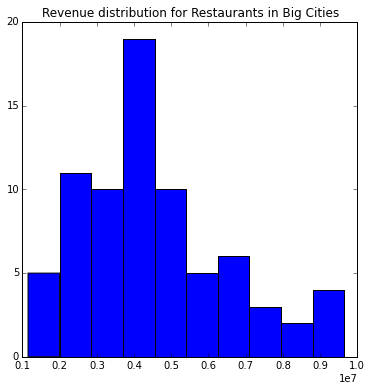

In [18]:
BigCitiesData = train_data[big_cities]
SumRevenueBigCities = sum(BigCitiesData['revenue'])
bigCitiesRevenues = BigCitiesData[['revenue']].values
plt.hist( bigCitiesRevenues, bins=10 )
plt.title("Revenue distribution for Restaurants in Big Cities")
plt.show()

In [19]:
#Median revenue value in restaurants in big cities:
np.median(bigCitiesRevenues)

4136425.0

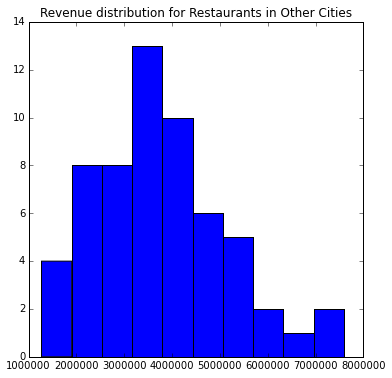

In [20]:
OtherCitiesData = train_data[~big_cities]
SumRevenueOtherCities = sum(OtherCitiesData['revenue'])
otherCitiesRevenues = OtherCitiesData[['revenue']].values
plt.hist( otherCitiesRevenues, bins=10 )
plt.title("Revenue distribution for Restaurants in Other Cities")
plt.show()

In [21]:
#Median revenue value in restaurants in other cities:
np.median(otherCitiesRevenues)

3745135.0

[338890219.0, 221422522.0]

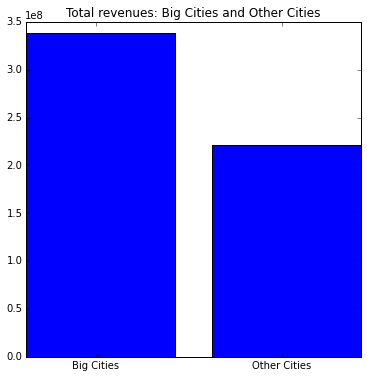

In [22]:
fig = plt.figure()
OX = ["Big Cities", "Other Cities"]
OY = [SumRevenueBigCities,SumRevenueOtherCities]
plt.bar(np.arange(len(OY)), OY)
plt.xticks(np.arange(len(OY)) + 0.75 / 2, OX)
plt.title("Total revenues: Big Cities and Other Cities")
OY

In [23]:
print "Average revenue of restaurants located in big cities: ", SumRevenueBigCities/len(BigCitiesData.index)
print "Average revenue of restaurants located in other cities: ", SumRevenueOtherCities/len(OtherCitiesData.index)

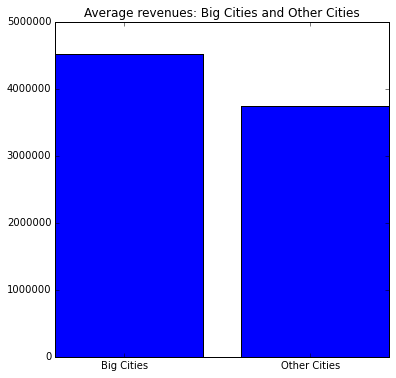

In [24]:
OX = ["Big Cities", "Other Cities"]
OY = [SumRevenueBigCities/len(BigCitiesData.index),SumRevenueOtherCities/len(OtherCitiesData.index)]
plt.bar(np.arange(len(OY)), OY)
plt.xticks(np.arange(len(OY)) + 0.75 / 2, OX)
plt.title("Average revenues: Big Cities and Other Cities")

#Revenue in different types of restaurants

In [25]:
train_data.groupby('Type').describe()

Id         P1        P10        P11        P12        P13  \
Type                                                                            
DT   count    1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
     mean   124.000000   1.000000   5.000000   2.000000   5.000000   5.000000   
     std           NaN        NaN        NaN        NaN        NaN        NaN   
     min    124.000000   1.000000   5.000000   2.000000   5.000000   5.000000   
     25%    124.000000   1.000000   5.000000   2.000000   5.000000   5.000000   
     50%    124.000000   1.000000   5.000000   2.000000   5.000000   5.000000   
     75%    124.000000   1.000000   5.000000   2.000000   5.000000   5.000000   
     max    124.000000   1.000000   5.000000   2.000000   5.000000   5.000000   
FC   count   74.000000  74.000000  74.000000  74.000000  74.000000  74.000000   
     mean    75.432432   3.554054   5.256757   3.094595   5.148649   4.966216   
     std     38.452276   2.511027   1.544418   1.760829   1.635919   0.877149   
     min      1.000000   1.000000   4.000000   1.000000   2.000000   3.000000   
     25%     45.750000   2.000000   5.000000   2.000000   4.000000   5.000000   
     50%     78.500000   3.000000   5.000000   3.000000   5.000000   5.000000   
     75%    105.750000   4.000000   5.000000   4.000000   5.000000   5.000000   
     max    136.000000  12.000000  10.000000  10.000000  10.000000   7.500000   
IL   count   59.000000  59.000000  59.000000  59.000000  59.000000  59.000000   
     mean    57.966102   4.644068   5.864407   3.440678   5.576271   5.279661   
     std     39.272244   3.325776   2.161239   2.111309   2.275836   1.197235   
     min      0.000000   1.000000   4.000000   1.000000   2.000000   3.000000   
     25%     25.000000   2.500000   5.000000   2.000000   5.000000   5.000000   
     50%     51.000000   4.000000   5.000000   3.000000   5.000000   5.000000   
     75%     90.000000   4.500000   5.000000   4.000000   5.000000   5.000000   
     max    126.000000  12.000000  10.000000  10.000000  10.000000   7.500000   

                  P14        P15        P16        P17       ...        \
Type                                                         ...         
DT   count   1.000000   1.000000   1.000000   1.000000       ...         
     mean    0.000000   0.000000   0.000000   0.000000       ...         
     std          NaN        NaN        NaN        NaN       ...         
     min     0.000000   0.000000   0.000000   0.000000       ...         
     25%     0.000000   0.000000   0.000000   0.000000       ...         
     50%     0.000000   0.000000   0.000000   0.000000       ...         
     75%     0.000000   0.000000   0.000000   0.000000       ...         
     max     0.000000   0.000000   0.000000   0.000000       ...         
FC   count  74.000000  74.000000  74.000000  74.000000       ...         
     mean    0.094595   0.040541   0.081081   0.040541       ...         
     std     0.577404   0.258509   0.517019   0.258509       ...         
     min     0.000000   0.000000   0.000000   0.000000       ...         
     25%     0.000000   0.000000   0.000000   0.000000       ...         
     50%     0.000000   0.000000   0.000000   0.000000       ...         
     75%     0.000000   0.000000   0.000000   0.000000       ...         
     max     4.000000   2.000000   4.000000   2.000000       ...         
IL   count  59.000000  59.000000  59.000000  59.000000       ...         
     mean    3.084746   3.084746   4.322034   2.271186       ...         
     std     3.415422   2.799557   4.236299   2.538195       ...         
     min     0.000000   0.000000   0.000000   0.000000       ...         
     25%     1.000000   1.000000   2.000000   1.000000       ...         
     50%     3.000000   2.000000   3.000000   2.000000       ...         
     75%     4.000000   4.000000   5.000000   3.000000       ...         
     max    15.000000  10.000000  15.000000  15.000000       ..

In [26]:
# Type of Restaurant
TypeValues = train_data[['Type']].values
typeRestaurants = np.unique(TypeValues) #array(['DT', 'FC', 'IL'], dtype=object)
SumRevenueForEachType = {}
AvgRevenueForEachType = {}
for typeRestaurant in typeRestaurants:
    boolType = train_data[['Type']].values == typeRestaurant
    tempData = train_data[boolType]
    SumRevenueForEachType[typeRestaurant] = sum(tempData[['revenue']].values)
    AvgRevenueForEachType[typeRestaurant] = SumRevenueForEachType[typeRestaurant]/len(tempData)
SumRevenueForEachType

{'DT': array([ 3810007.]),
 'FC': array([  3.19735204e+08]),
 'IL': array([  2.36767530e+08])}

[array([ 3810007.]), array([  3.19735204e+08]), array([  2.36767530e+08])]

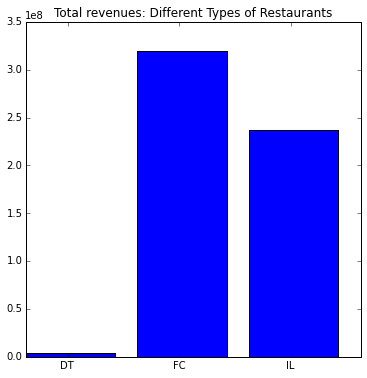

In [27]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
fig = plt.figure()
OX = SumRevenueForEachType.keys()
OY = SumRevenueForEachType.values()
plt.bar(np.arange(len(OY)), OY)
plt.xticks(np.arange(len(OY)) + 0.75 / 2, OX)
plt.title("Total revenues: Different Types of Restaurants")
OY

In [28]:
# Median revenue for each type of restaurant
medianRevenuesForType = []
for typeRestaurant in typeRestaurants:
    boolType = train_data[['Type']].values == typeRestaurant
    tempData = train_data[boolType]
    medianRevenuesForType.append(np.median(tempData[['revenue']].values))
zip(typeRestaurants, medianRevenuesForType)

[('DT', 3810007.0), ('FC', 3793058.5), ('IL', 4015749.0)]

[array([ 3810007.]), array([ 4320746.]), array([ 4013008.98305085])]

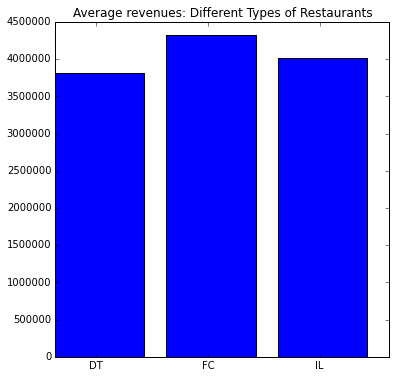

In [29]:
OX = AvgRevenueForEachType.keys()
OY = AvgRevenueForEachType.values()
plt.bar(np.arange(len(OY)), OY)
plt.xticks(np.arange(len(OY)) + 0.75 / 2, OX)
plt.title("Average revenues: Different Types of Restaurants")
OY

# Predictive Models

Partition data as for training and validation.

In [30]:
train_data.columns

Index([u'index', u'Id', u'City', u'City Group', u'Type', u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19', u'P20', u'P21', u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28', u'P29', u'P30', u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37', u'revenue', u'Date'], dtype='object')

In [31]:
features = train_data.drop(['index', 'Id', 'City', 'Date'],inplace=False,axis=1)
from sklearn import preprocessing
typesEncoder = preprocessing.LabelEncoder()
#to convert into numbers
features.Type = typesEncoder.fit_transform(features.Type)
cityGroupEncoder = preprocessing.LabelEncoder()
#to convert into numbers
features.rename(columns={'City Group': 'CityGroup'}, inplace=True)
features.CityGroup = cityGroupEncoder.fit_transform(features.CityGroup)
features.revenue = features.revenue/1000000
import math
features.revenue = np.log(features.revenue)
features.head()

,CityGroup,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
35,1,2,4,5.0,4,3.0,1,2,5,4,...,2.0,4,1,3,3,3,4,3,3,1.361972
122,0,2,12,7.5,6,7.5,2,8,10,8,...,2.5,25,15,25,6,18,3,16,6,1.455504
28,0,2,4,5.0,4,4.0,1,3,5,5,...,2.0,3,5,5,2,3,5,4,4,1.548827
112,0,2,4,5.0,5,4.0,1,5,5,5,...,3.0,3,2,1,2,2,1,3,3,1.330842
64,0,2,12,7.5,6,6.0,2,8,10,10,...,7.5,20,15,25,4,24,15,20,6,0.936584


In [32]:
revenue_values = features.revenue
lowest = np.min(revenue_values)
highest = np.max(revenue_values)
lowest, highest

(0.13964889250700224, 2.2672014090199673)

In [33]:
X = features.drop(['revenue'], inplace = False, axis = 1)
y = features.revenue
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

#http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html

In [34]:
from sklearn.metrics import accuracy_score

#Linear Regression

In [35]:
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

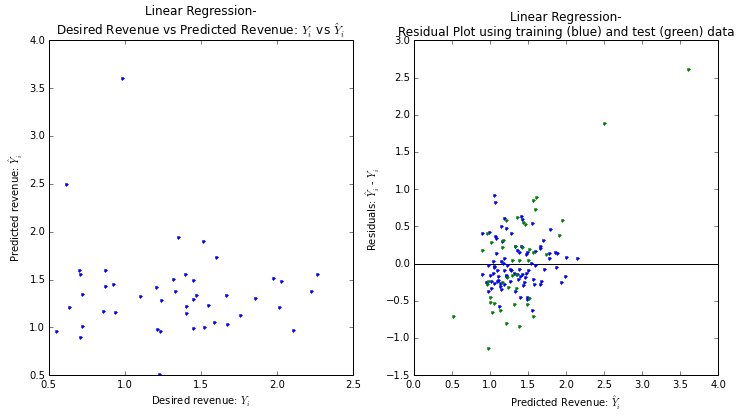

'\nLinear Regression:\nMean absolute error: -0.468713\nMean Squared error: -0.363286\nMedian absolute error: -0.395401\nR squared term: 0.466216\n'

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_predicted_lm = lm.predict(x_test)


plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)

axarr[0].plot(y_test,Y_predicted_lm, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Linear Regression- \nDesired Revenue vs Predicted Revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(lm.predict(x_train), lm.predict(x_train) - y_train, 'b.', label = "Training data")
axarr[1].plot(lm.predict(x_test), lm.predict(x_test) - y_test, 'g.', label = "Test data")
axarr[1].hlines(y=0, xmin=0, xmax=4.0)
axarr[1].set_title('Linear Regression- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted Revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(lm, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(lm, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(lm, X, y, cv=20, scoring='mean_squared_error')

print "Linear Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % lm.score(x_train, y_train))

'''
Linear Regression:
Mean absolute error: -0.468713
Mean Squared error: -0.363286
Median absolute error: -0.395401
R squared term: 0.466216
'''

#Lasso

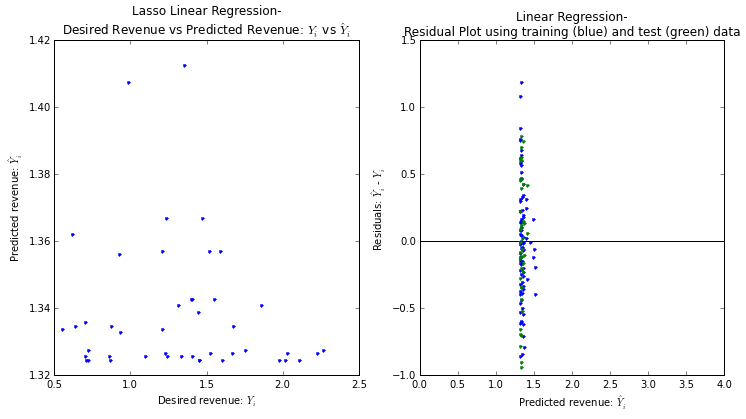

In [47]:
from sklearn import linear_model 
lassolm = linear_model.Lasso(alpha=.3)
lassolm.fit(x_train, y_train) 
Y_predicted_lassolm = lassolm.predict(x_test)


f, axarr = plt.subplots(1,2)

axarr[0].plot(y_test,Y_predicted_lassolm, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Lasso Linear Regression- \nDesired Revenue vs Predicted Revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(lassolm.predict(x_train), lassolm.predict(x_train) - y_train, 'b.', label = "Training data")
axarr[1].plot(lassolm.predict(x_test), lassolm.predict(x_test) - y_test, 'g.', label = "Test data")
axarr[1].hlines(y=0, xmin=0, xmax=4.0)
axarr[1].set_title('Linear Regression- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(lassolm, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(lassolm, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(lassolm, X, y, cv=20, scoring='mean_squared_error')

print "Lasso Linear Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % lassolm.score(x_train, y_train))

In [60]:
#Accuracy: 0.52 (+/- 0.47) mean_squared_error
#Accuracy: 0.62 (+/- 0.32) mean_absolute_error

The degrees of freedom of the model are the number of predictor, or explanatory variables ( citygroup, type, P1-P37). The degrees of freedom of the residuals is the number of observations minus the degrees of freedom of the model, minus one (134-39-1).

R squared term 
R^{2} term is the correlation coefficient. It shows percentage of variance which is explained by the model. R-Squared is a statistical term saying how good one term is at predicting another.  If R-Squared is 1.0 then knowledge of one term, can help you perfectly predict the value of another term.  If R-Squared is 0.0, then knowing one term does not not help you know the other term at all.  More generally, a higher value of R-Squared means that you can better predict one term from another. R-Squared value given here says how well the predicted values match the original data points. 

Adjusted R squared term
With 39 predictors, we can face the curse of dimensionality.  The adjusted R^{2} takes into account the number of predictor variablesand number of observations, i.e. Like R^{2}, Adjusted R^{2} also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. The value of this term increases with addition of more useful predictors and decreases with inclusion of non-contributing features. Adjusted R^{2} will always be less than or equal to R^{2}.



References
http://connor-johnson.com/2014/02/18/linear-regression-with-python/
http://ipython-books.github.io/featured-04/
http://www.statisticshowto.com/adjusted-r2/
http://www.trade-ideas.com/glossary/r-squared/

#Ridge Regression

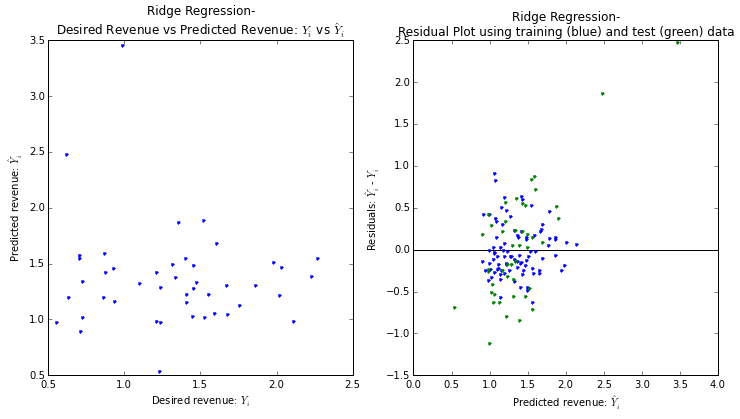

In [48]:
from sklearn import linear_model 
clf = linear_model.Ridge(alpha=.3)
clf.fit(x_train, y_train) 
Y_predicted_ridge = clf.predict(x_test)


f, axarr = plt.subplots(1,2)

axarr[0].plot(y_test,Y_predicted_ridge, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Ridge Regression- \nDesired Revenue vs Predicted Revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.', label = "Training data")
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.', label = "Test data")
axarr[1].hlines(y=0, xmin=0, xmax=4.0)
axarr[1].set_title('Ridge Regression- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "Ridge Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

In [61]:
#Accuracy: 0.50 (+/- 0.79) mean_squared_error
#Accuracy: 0.56 (+/- 0.45) mean_absolute_error

#RidgeCV

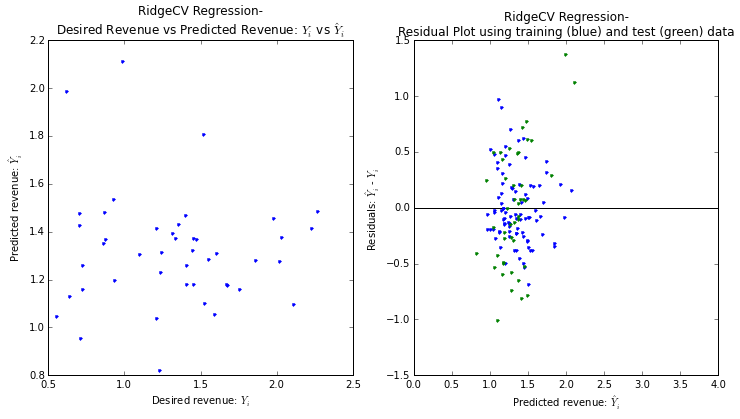

In [49]:
from sklearn import linear_model 
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit(x_train, y_train) 
Y_predicted_ridgecv = clf.predict(x_test)

f, axarr = plt.subplots(1,2)

axarr[0].plot(y_test,Y_predicted_ridgecv, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("RidgeCV Regression- \nDesired Revenue vs Predicted Revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.', label = "Training data")
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.', label = "Test data")
axarr[1].hlines(y=0, xmin=0, xmax=4.0)
axarr[1].set_title('RidgeCV Regression- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "RidgeCV Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

In [62]:
#Accuracy: 0.50 (+/- 0.79) mean_squared_error
#Accuracy: 0.56 (+/- 0.45) mean_absolute_error

#SVR

In [ ]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly', degree=2)
ypoly = svr_poly.fit(x_train, y_train).predict(x_test)

In [ ]:

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)

axarr[0].plot(y_test,ypoly, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("SVR (polynomial kernel)- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(ypoly, ypoly - y_test, 'g.')
axarr[1].hlines(y=0, xmin=0, xmax=4.0)
axarr[1].set_title('SVR (polynomial kernel)- \nResidual Plot for SVR with polynomial kernel')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()


plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [ ]:
scoresMAE = cross_validation.cross_val_score(svr_rbf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(svr_rbf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(svr_rbf, X, y, cv=20, scoring='mean_squared_error')

print "svr_rbf Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % svr_rbf.score(x_train, y_train))

In [ ]:
scoresMAE = cross_validation.cross_val_score(svr_lin, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(svr_lin, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(svr_lin, X, y, cv=20, scoring='mean_squared_error')

print "svr_lin Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % svr_lin.score(x_train, y_train))

In [ ]:
scoresMAE = cross_validation.cross_val_score(svr_poly, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(svr_poly, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(svr_poly, X, y, cv=20, scoring='mean_squared_error')

print "svr_poly Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % svr_poly.score(x_train, y_train))

In [74]:
#rbf
#Accuracy: 0.16 (+/- 0.23) mean_squared_error
#Accuracy: 0.24 (+/- 0.24) mean_absolute_error
#linear
#Accuracy: 0.41 (+/- 0.68) mean_squared_error
#Accuracy: 0.48 (+/- 0.42) mean_absolute_error
#poly
#Accuracy: 0.22 (+/- 0.16) mean_squared_error
#Accuracy: 0.36 (+/- 0.20) mean_absolute_error


In [ ]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(x_train, y_train)
y_pred = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(x_train, y_train).predict(x_train)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)

axarr[0,0].plot(y_test,y_pred, 'b.') 
axarr[0,0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0,0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0,0].set_title("Gradient Boosting Regressor- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[0,1].plot(y_pred, y_pred - y_test, 'g.')
axarr[0,1].hlines(y=0, xmin=0, xmax=4.0)
axarr[0,1].set_title('Gradient Boosting Regressor- \nResidual Plot using training (blue) and test (green) data')
axarr[0,1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[0,1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(svr_lin, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(svr_lin, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(svr_lin, X, y, cv=20, scoring='mean_squared_error')

print "GBR:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % est.score(x_train, y_train))
'''
#print "MSE is ", np.mean((y_test - y_pred)**2)
print "R squared error is ", est.score(x_train, y_train)
scores = cross_validation.cross_val_score(est, X, y, cv=5, scoring='mean_squared_error')
print("Accuracy: %0.2f (+/- %0.2f) mean_squared_error" % (abs(scores.mean()), scores.std() * 2))
scores = cross_validation.cross_val_score(est, X, y, cv=5, scoring='mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) mean_absolute_error" % (abs(scores.mean()), scores.std() * 2))
#Accuracy: 0.16 (+/- 0.06) mean_squared_error
#Accuracy: 0.27 (+/- 0.08) mean_absolute_error

#R squared error is  0.424005680004
#Accuracy: 3827121335783.26 (+/- 2165229859046.89) mean_squared_error
#Accuracy: 1489483.28 (+/- 467854.62) mean_absolute_error
'''

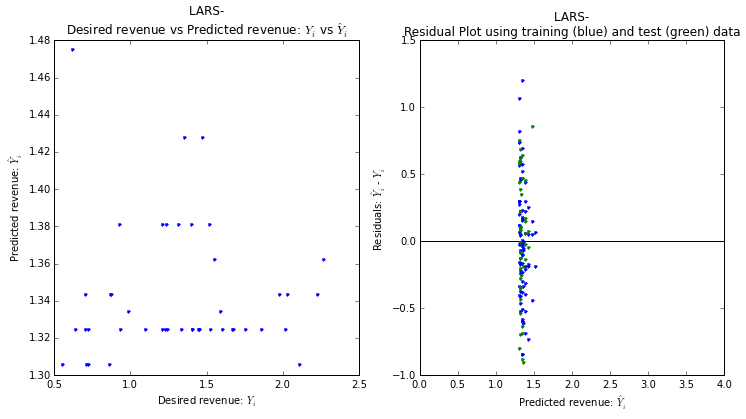

'\nplt.scatter(y_test,Y_predicted_lars) \nplt.xlabel("Prices: $Y_i$") \nplt.ylabel("Predicted prices: $\\hat{Y}_i$") \nplt.title("LARS- \nPrices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$")\nplt.show()\nplt.scatter(clf.predict(x_train), clf.predict(x_train) - y_train, c = \'b\')\nplt.scatter(clf.predict(x_test), clf.predict(x_test) - y_test, c = \'g\')\nplt.hlines(y=0, xmin=0, xmax=1)\nplt.title(\'Residual Plot using training (blue) and test (green) data\')\nplt.ylabel(\'Residuals\')\nplt.show()\n# calculate the R-squared\nclf.score(x_train, y_train)\n'

In [50]:
#LARS
from sklearn import linear_model
clf = linear_model.Lars(n_nonzero_coefs=1)
clf.fit(x_train, y_train)
Y_predicted_lars = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)

axarr[0].plot(y_test,Y_predicted_lars, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("LARS- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=0, xmax=4.0)
axarr[1].set_title('LARS- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "LARS:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

'''
plt.scatter(y_test,Y_predicted_lars) 
plt.xlabel("Prices: $Y_i$") 
plt.ylabel("Predicted prices: $\hat{Y}_i$") 
plt.title("LARS- \nPrices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
plt.scatter(clf.predict(x_train), clf.predict(x_train) - y_train, c = 'b')
plt.scatter(clf.predict(x_test), clf.predict(x_test) - y_test, c = 'g')
plt.hlines(y=0, xmin=0, xmax=1)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()
# calculate the R-squared
clf.score(x_train, y_train)
'''

In [41]:
#Accuracy: 0.51 (+/- 0.83) mean_squared_error
#Accuracy: 0.56 (+/- 0.47) mean_absolute_error

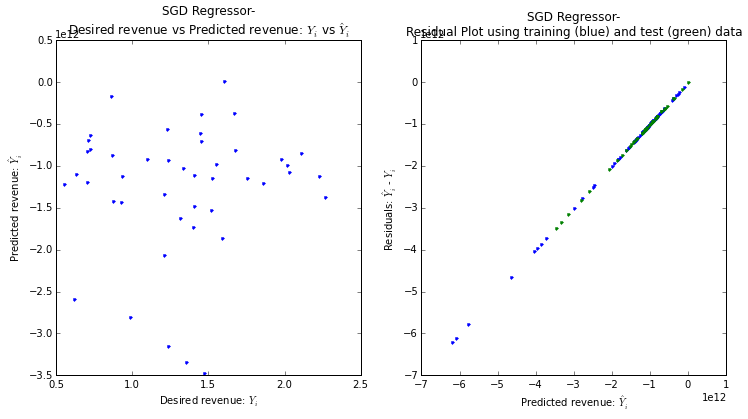

In [53]:
#sgdregressor
clf = linear_model.SGDRegressor()
clf.fit(x_train, y_train)
Y_predicted_sgdr = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_sgdr, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("SGD Regressor- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-0.6, xmax=1.2)
axarr[1].set_title('SGD Regressor- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "SGD Regressor:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

In [82]:
scores = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')
print("Accuracy: %0.2f (+/- %0.2f) mean_squared_error" % (abs(scores.mean()), scores.std() * 2))
scores = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) mean_absolute_error" % (abs(scores.mean()), scores.std() * 2))
#Accuracy: 0.94 (+/- 1.00) mean_squared_error
#Accuracy: 0.88 (+/- 0.55) mean_absolute_error

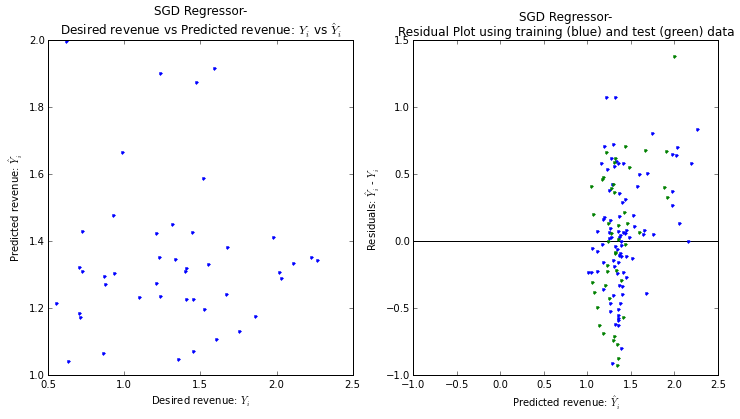

In [55]:
#sgdregressor using elasticnet penalty, eta=0.001, epsilon=0.5
clf = linear_model.SGDRegressor(penalty='elasticnet', eta0=0.001, epsilon=0.5)
clf.fit(x_train, y_train)
Y_predicted_sgdr = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_sgdr, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("SGD Regressor- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-1, xmax=2.5)
axarr[1].set_title('SGD Regressor- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "SGD Regressor:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

In [56]:
#Accuracy: 0.95 (+/- 0.88) mean_squared_error
#Accuracy: 0.89 (+/- 0.46) mean_absolute_error

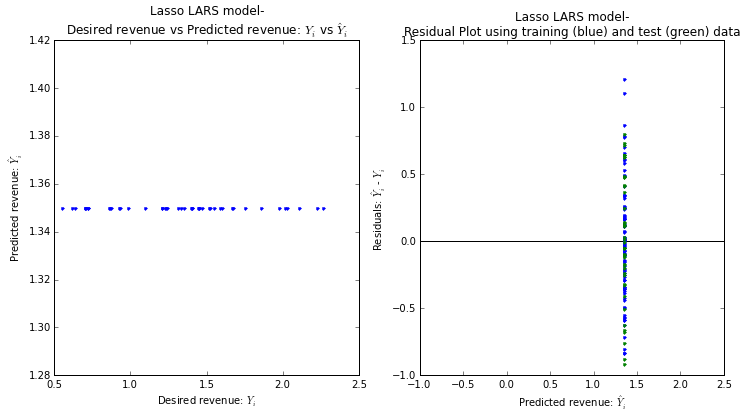

In [58]:
from sklearn import linear_model
clf = linear_model.LassoLars(alpha=.1)
clf.fit(x_train,y_train)
Y_predicted_llars = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_llars, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Lasso LARS model- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-1, xmax=2.5)
axarr[1].set_title('Lasso LARS model- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "Lasso LARS model:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))
#Accuracy: 0.98 (+/- 1.54) mean_squared_error
#Accuracy: 0.87 (+/- 0.78) mean_absolute_error

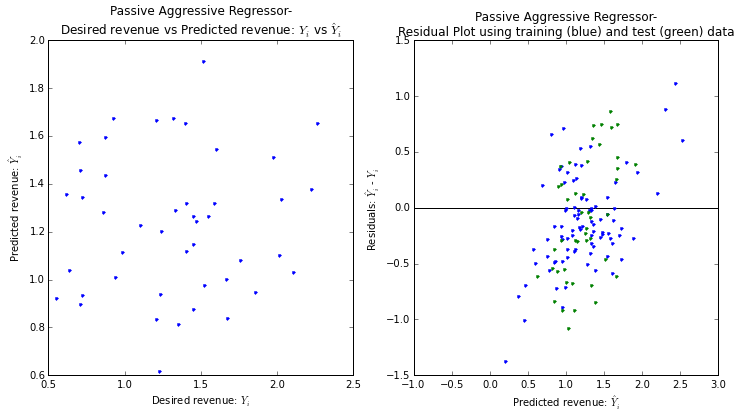

In [61]:
#PassiveAggressiveRegressor
clf = linear_model.PassiveAggressiveRegressor( epsilon=0.1, random_state=24, n_iter=100)
clf.fit(x_train,y_train)
Y_predicted_par = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_par, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Passive Aggressive Regressor- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-1, xmax=3.0)
axarr[1].set_title('Passive Aggressive Regressor- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "PAR model:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

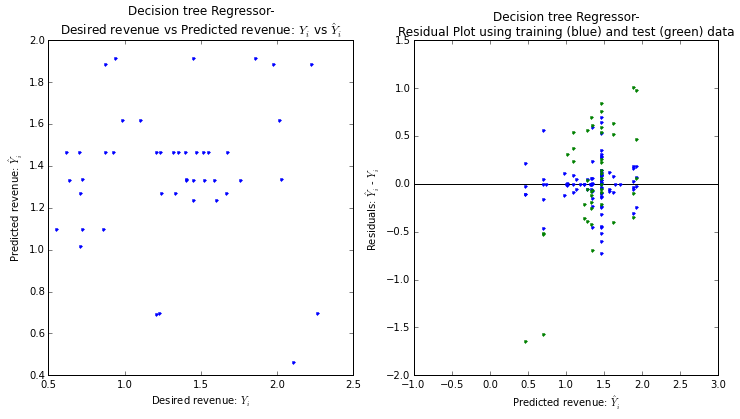

In [38]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(x_train, y_train)
Y_predicted_dt = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_dt, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Decision tree Regressor- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-1, xmax=3.0)
axarr[1].set_title('Decision tree Regressor- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "decision tree model:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

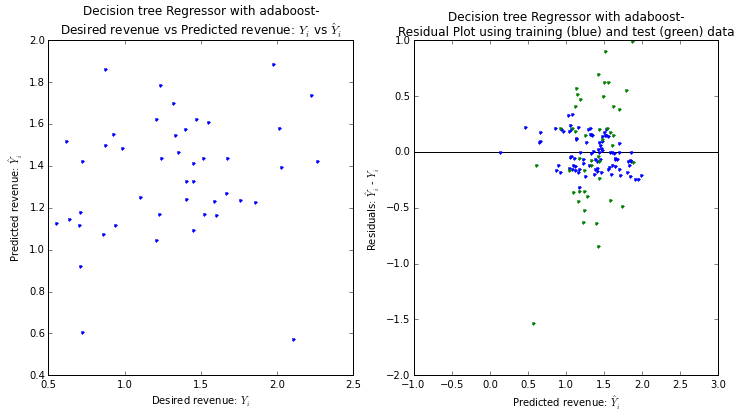

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
rng = np.random.RandomState(1)
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=500, random_state=rng)
clf.fit(x_train, y_train)
Y_predicted_dt = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_dt, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Decision tree Regressor with adaboost- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-1, xmax=3.0)
axarr[1].set_title('Decision tree Regressor with adaboost- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "decision tree model with adaboost:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))

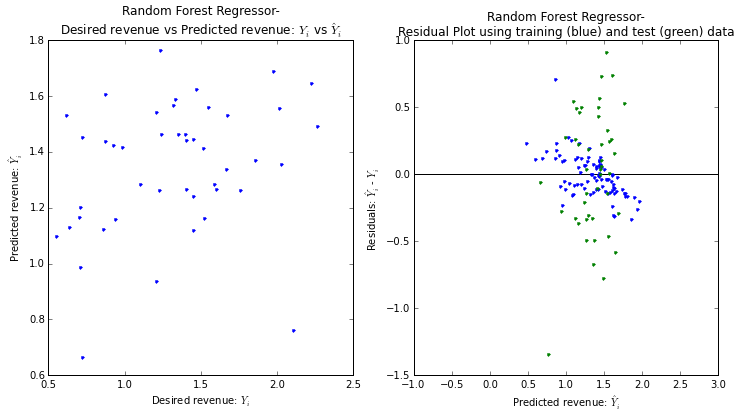

In [51]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=0, n_estimators=100)
clf.fit(x_train, y_train)
Y_predicted_dt = clf.predict(x_test)

plt.rcParams['figure.figsize'] = (12.0, 6.0)
f, axarr = plt.subplots(1,2)
axarr[0].plot(y_test,Y_predicted_dt, 'b.') 
axarr[0].set_xlabel("Desired revenue: $Y_i$") 
axarr[0].set_ylabel("Predicted revenue: $\hat{Y}_i$") 
axarr[0].set_title("Random Forest Regressor- \nDesired revenue vs Predicted revenue: $Y_i$ vs $\hat{Y}_i$")

axarr[1].plot(clf.predict(x_train), clf.predict(x_train) - y_train, 'b.')
axarr[1].plot(clf.predict(x_test), clf.predict(x_test) - y_test, 'g.')
axarr[1].hlines(y=0, xmin=-1, xmax=3.0)
axarr[1].set_title('Random Forest Regressor- \nResidual Plot using training (blue) and test (green) data')
axarr[1].set_ylabel('Residuals: $\hat{Y}_i$ - $Y_i$ ')
axarr[1].set_xlabel("Predicted revenue: $\hat{Y}_i$") 
plt.show()

scoresMAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_absolute_error')

scoresMedAE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='median_absolute_error')

scoresMSE = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='mean_squared_error')

print "Random Forest Regressor Regression:"
print("Mean absolute error: %f" % scoresMAE.mean())
print("Mean Squared error: %f" % scoresMSE.mean())
print("Median absolute error: %f" % scoresMedAE.mean())
print("R squared term: %f" % clf.score(x_train, y_train))